In [1]:
# Import our modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
#warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
#import missingno as msno # missing data visualization module for Python

import gc
import datetime

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Loading our data
df = pd.read_csv('ecommerce_data.csv', encoding = 'ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
print(df.describe())
print(df.info())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
d

In [4]:
#dropping null values
df2 = df.copy()
df2 = df2.dropna(axis = 0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
# check missing values for each column 
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
# change the invoice_date format - String to Timestamp format
df2['InvoiceDate'] = pd.to_datetime(df2.InvoiceDate, infer_datetime_format=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
# remove negative quanitites
df2 = df2[df2['Quantity'] >= 0]
df2 = df2[df2['UnitPrice'] >= 0]
df2.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [8]:
#converting customerID column from float to integer type
df2['CustomerID'] = df2['CustomerID'].astype('int64')

In [9]:
#creating Amount Spent column by multiplying the qty by unitprice
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [10]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['Month_Year'] = pd.to_datetime(df2['InvoiceDate']).dt.to_period('M')
df2.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12


In [11]:
#creating a yea, month, day, day of the week, dayof theyear, & quater column
List = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter']


In [12]:
df3 = df2.copy()
for i in List: 
    new_column = getattr(df2['InvoiceDate'].dt, i).rename(i)
    df3 = df3.join(new_column)
df3.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month_Year,year,month,day,dayofweek,dayofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,4
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,2010,12,1,2,335,4
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2010,12,1,2,335,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2010,12,1,2,335,4
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,2010,12,1,2,335,4


In [13]:
# +1 to make Monday=1.....until Sunday=7
df3['dayofweek'] = df3['dayofweek'] + 1
#df3.head()
df3['dayofweek'].unique()

array([3, 4, 5, 7, 1, 2], dtype=int64)

## Exploratory Analysis

In [14]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
customer_sales = df3.groupby(['CustomerID', 'Country'], as_index=False)
orders_per_customer = customer_sales['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
orders_per_customer.columns = ['CustomerID', 'Country', 'NumberOfSales']
orders_per_customer.head()

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


In [15]:
# Visualizing No. of Sales for all Customers

#plt.subplots(figsize=(15,6))
#plt.plot(orders_per_customer.CustomerID, orders_per_customer.NumberOfSales)

#plt.title('Sales by Customer')
#plt.xlabel('Customer ID')
#plt.ylabel('Number of Sales')
#plt.show()

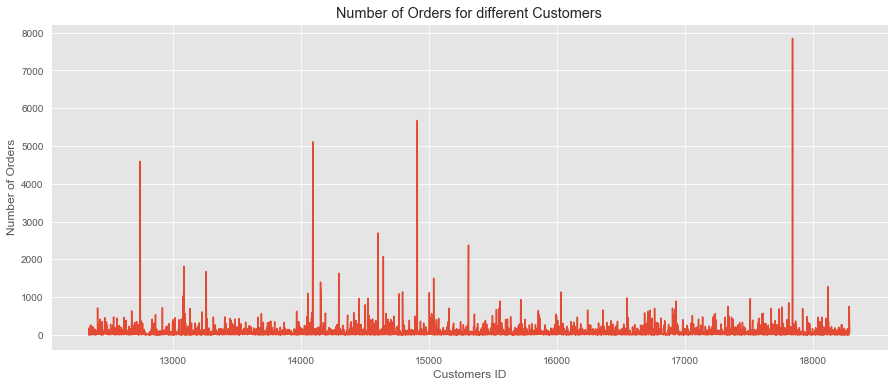

In [16]:
orders = df3.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

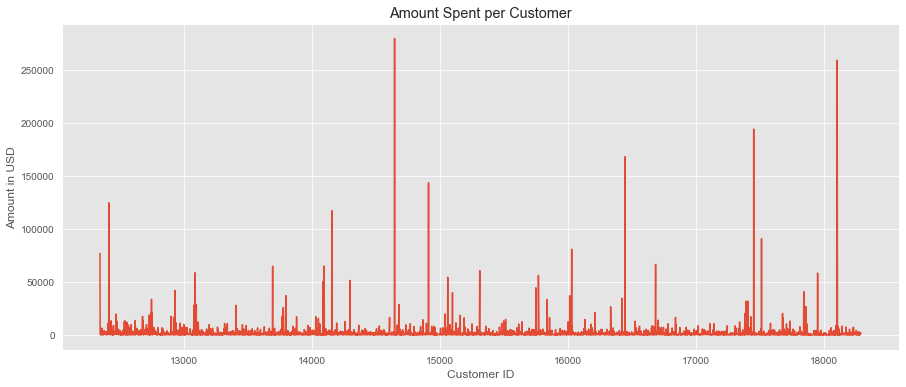

In [17]:
# Visualizing Money Spent for all Customer
Spent = df3.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(Spent.CustomerID, Spent.AmountSpent)
plt.xlabel('Customer ID')
plt.ylabel('Amount in USD')
plt.title('Amount Spent per Customer')
plt.show()

In [18]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_customer = Spent.sort_values(by = 'AmountSpent', ascending=False)
spent_per_customer

,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
...,...,...,...
4107,17956,United Kingdom,12.75
3023,16454,United Kingdom,6.90
1802,14792,United Kingdom,6.20
3226,16738,United Kingdom,3.75


### Purchasing patterns

In [19]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df3.insert(loc = 2, column='yearmonth', value=df3['InvoiceDate'].map(lambda x: 100*x.year + x.month))
# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df3.insert(loc=5, column='hour', value=df3['InvoiceDate'].map(lambda x: x.hour))
df3.head(10)

,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month_Year,year,month,day,dayofweek,dayofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4
5,536365,22752,201012,SET 7 BABUSHKA NESTING BOXES,2,8,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4
6,536365,21730,201012,GLASS STAR FROSTED T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,2010,12,1,3,335,4
7,536366,22633,201012,HAND WARMER UNION JACK,6,8,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2010,12,1,3,335,4
8,536366,22632,201012,HAND WARMER RED POLKA DOT,6,8,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2010,12,1,3,335,4
9,536367,84879,201012,ASSORTED COLOUR BIRD ORNAMENT,32,8,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,2010,12,1,3,335,4


In [20]:
# Let's see the hours that we have
df3['hour'].unique()
#Let's plot a graph showing our peak hours by country
peak_hours = df3.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1]
#peak_hours = pd.DataFrame(peak_hours)
#peak_hours = peak_hours.rename(columns = {'InvoiceNo':'NumberofSales'})
peak_hours

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]    3129
[13]    2637
[11]    2276
[14]    2275
[10]    2226
[15]    2038
[9]     1394
[16]    1100
[8]      555
[17]     544
[18]     169
[19]     144
[7]       29
[20]      18
[6]        1
Name: hour, dtype: int64

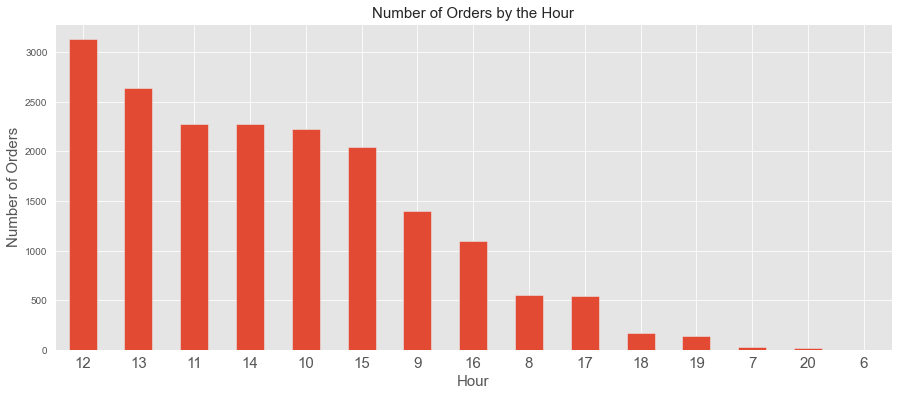

In [21]:
#plotting the above
orders_by_hour= peak_hours.plot(kind='bar', figsize=(15,6))
orders_by_hour.set_xlabel('Hour', fontsize=15)
orders_by_hour.set_ylabel('Number of Orders', fontsize=15)
orders_by_hour.set_title('Number of Orders by the Hour', fontsize=15)
orders_by_hour.set_xticklabels(('12','13','11','14','10','15','9','16','8','17','18','19','7','20','6'),rotation='horizontal', fontsize=15)
plt.show()

In [22]:
#orders per day
orders_per_weekday = df3.groupby('InvoiceNo')['dayofweek'].unique().value_counts()
orders_per_weekday

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[4]    4033
[3]    3455
[2]    3185
[1]    2863
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

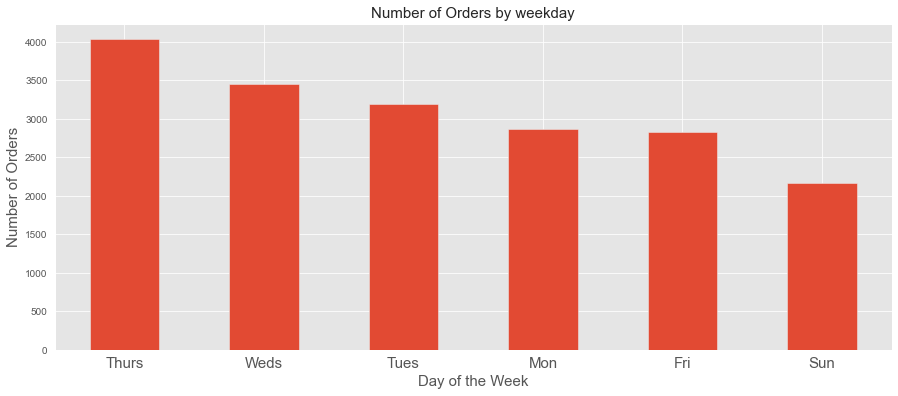

In [23]:
#plotting the number of orders by the weekday
weekday_charts = orders_per_weekday.plot(kind='bar', figsize=(15,6))
weekday_charts.set_xlabel('Day of the Week', fontsize=15)
weekday_charts.set_ylabel('Number of Orders', fontsize=15)
weekday_charts.set_title('Number of Orders by weekday', fontsize=15)
weekday_charts.set_xticklabels(('Thurs','Weds','Tues','Mon','Fri','Sun'),rotation='horizontal', fontsize=15)
plt.show()

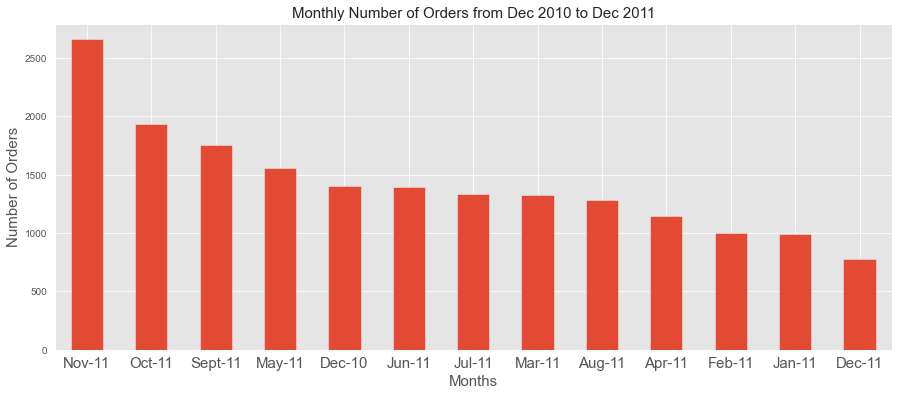

In [24]:
# Create a plot that shows the number of orders per month 
orders_per_month = df3.groupby('InvoiceNo')['Month_Year'].unique().value_counts()
orders_per_month = orders_per_month.iloc[:-1]
monthly_charts = orders_per_month.plot(kind='bar', figsize=(15,6))
monthly_charts.set_xlabel('Months', fontsize=15)
monthly_charts.set_ylabel('Number of Orders', fontsize=15)
monthly_charts.set_title('Monthly Number of Orders from Dec 2010 to Dec 2011', fontsize=15)
monthly_charts.set_xticklabels(('Nov-11','Oct-11','Sept-11','May-11','Dec-10','Jun-11', 'Jul-11', 'Mar-11','Aug-11','Apr-11','Feb-11','Jan-11','Dec-11'),rotation='horizontal', fontsize=15)
plt.show()

In [25]:
# What are the free items
free_items = df3[df3['UnitPrice'] == 0]
print(len(free_items))
free_items.head()

40


,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month_Year,year,month,day,dayofweek,dayofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1


In [26]:
# See when these free items were given out
fi_per_month = free_items.groupby(['Month_Year'], as_index=False)['InvoiceNo'].count()
fi_per_month.columns = ['Month_Year', 'TotalOrders']
print(fi_per_month)


   Month_Year  TotalOrders
0     2010-12            3
1     2011-01            3
2     2011-02            1
3     2011-03            2
4     2011-04            2
5     2011-05            2
6     2011-07            2
7     2011-08            6
8     2011-09            2
9     2011-10            3
10    2011-11           14


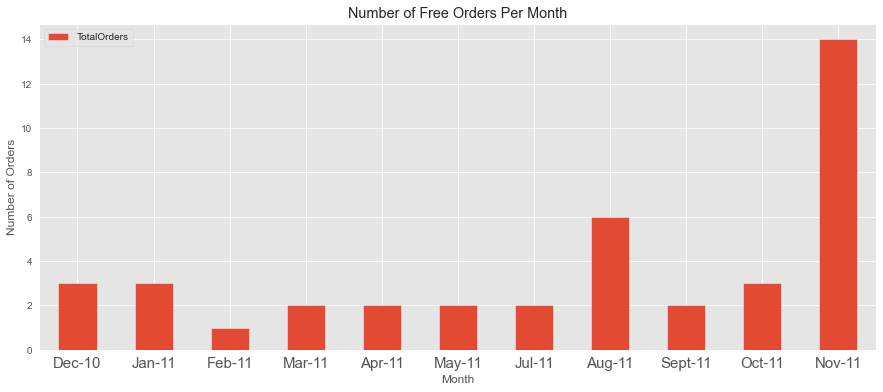

In [27]:
# Ploting the above data
free_items_chart = fi_per_month.plot(x='Month_Year', y='TotalOrders', kind='bar', figsize=(15,6), xlabel='Month', ylabel='Number of Orders',title='Number of Free Orders Per Month')
free_items_chart.set_xticklabels(('Dec-10','Jan-11','Feb-11','Mar-11','Apr-11','May-11','Jul-11','Aug-11','Sept-11','Oct-11','Nov-11'),rotation='horizontal',fontsize=15)
plt.show()

In [28]:
# plot number of unique customers in each country (with UK)
customers_by_country = df3.groupby(['Country'], as_index=False)['CustomerID'].nunique()
customers_by_country.columns = ['Country','No of Customers']
customers_by_country

,Country,No of Customers
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


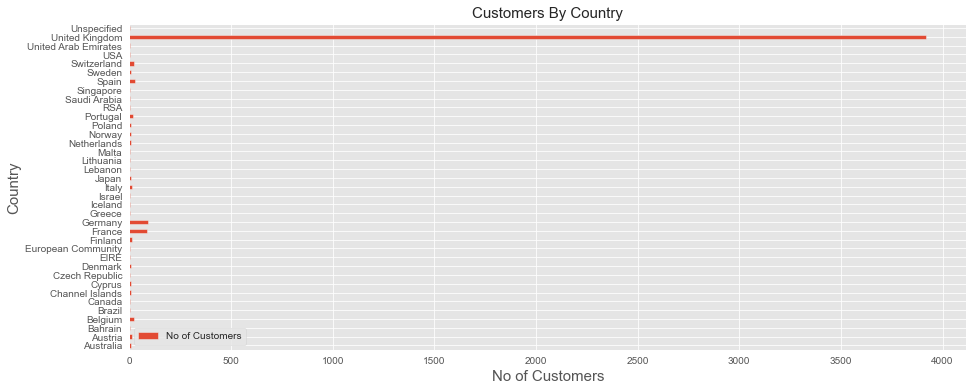

In [29]:
#plotting the above data
chart_country_customers = customers_by_country.plot(x='Country',y='No of Customers',kind='barh',figsize=(15,6))
chart_country_customers.set_ylabel('Country',fontsize=15)
chart_country_customers.set_xlabel('No of Customers',fontsize=15)
chart_country_customers.set_title('Customers By Country',fontsize=15)
plt.show()

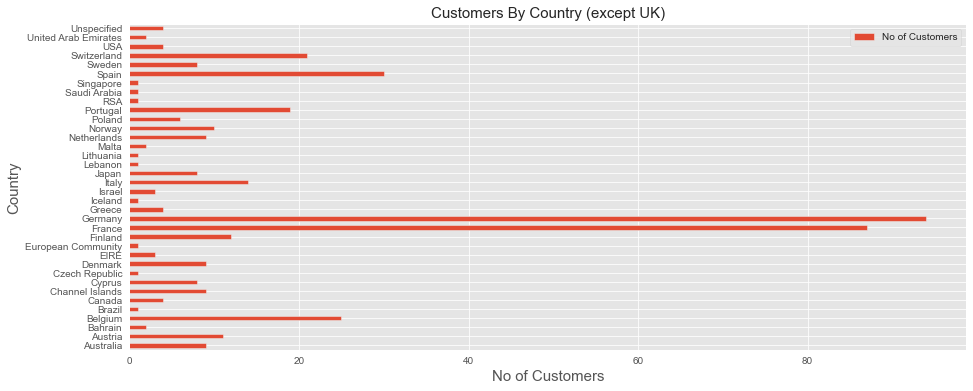

In [30]:
# Excluding UK now
customers_by_country_no_uk = customers_by_country.drop([35], axis=0)
customers_by_country_no_uk
# plot number of unique customers in each country (without UK)
chart_country_customers_no_uk = customers_by_country_no_uk.plot(x='Country',y='No of Customers',kind='barh',figsize=(15,6))
chart_country_customers_no_uk.set_ylabel('Country',fontsize=15)
chart_country_customers_no_uk.set_xlabel('No of Customers',fontsize=15)
chart_country_customers_no_uk.set_title('Customers By Country (except UK)',fontsize=15)
plt.show()

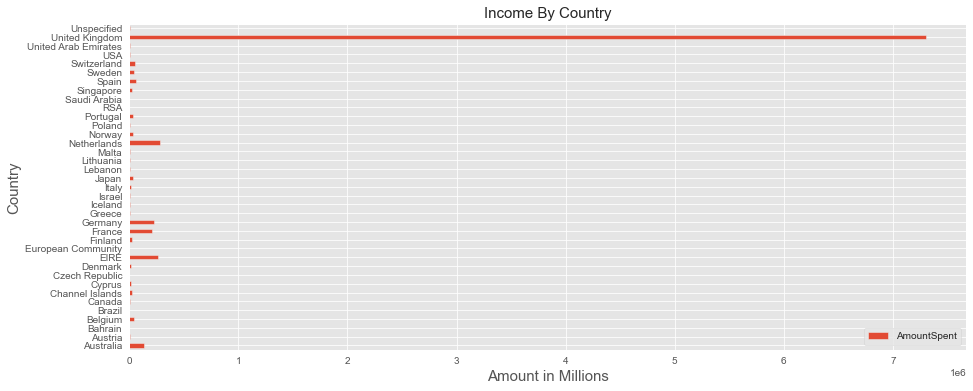

In [31]:
#Amount spent per country
Country_income = df3.groupby(['Country'], as_index=False)['AmountSpent'].sum()

# Amount spent by each country
Country_income_chart = Country_income.plot(x='Country', y='AmountSpent', kind='barh', figsize=(15,6))
Country_income_chart.set_ylabel('Country',fontsize=15)
Country_income_chart.set_xlabel('Amount in Millions',fontsize=15)
Country_income_chart.set_title('Income By Country',fontsize=15)
plt.show()
# plot total money spent by each country

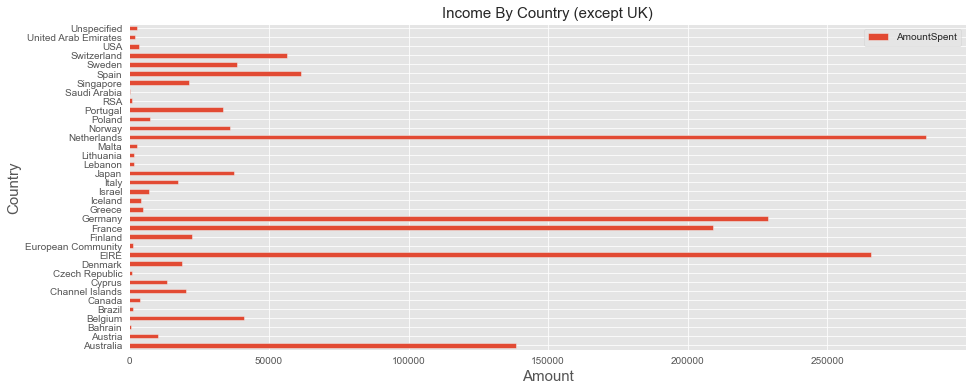

In [32]:
#Amount spent per country(without UK)
Country_income_no_uk = Country_income.drop([35], axis=0)
Country_income_no_uk
# Amount spent by each country
Country_income_chart_no_uk = Country_income_no_uk.plot(x='Country', y='AmountSpent', kind='barh', figsize=(15,6))
Country_income_chart_no_uk.set_ylabel('Country',fontsize=15)
Country_income_chart_no_uk.set_xlabel('Amount',fontsize=15)
Country_income_chart_no_uk.set_title('Income By Country (except UK)',fontsize=15)
plt.show()

### Repeat Customers

In [33]:
Monthly_customers = df3.groupby(['Month_Year','CustomerID'])['CustomerID'].nunique()
Monthly_customers.head(20)

Month_Year  CustomerID
2010-12     12347         1
            12348         1
            12370         1
            12377         1
            12383         1
            12386         1
            12395         1
            12417         1
            12423         1
            12427         1
            12429         1
            12431         1
            12433         1
            12441         1
            12471         1
            12472         1
            12476         1
            12481         1
            12494         1
            12515         1
Name: CustomerID, dtype: int64

In [34]:
# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df4 = df3[df3['InvoiceDate'] < '2011-12-01']
print(df4['InvoiceDate'].max())

2011-11-30 17:37:00


In [35]:
# Get total amount spent per invoice and associate it with CustomerID and Country
Invoice_customer_df = df4.groupby(['InvoiceNo','InvoiceDate'], as_index=False).agg({'AmountSpent':sum, 'CustomerID':max, 'Country':max})
Invoice_customer_df.head()


,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [36]:
# Sort on Amount spent, this gives us the largest invoices
Invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [37]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)
monthly_repeat_customers_df = Invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [38]:
# Number of Unique customers per month
monthly_unique_customers = Invoice_customer_df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [59]:
# Ratio of Repeat to Unique customers
monthly_repeat_ratio = monthly_repeat_customers_df/monthly_unique_customers*100
monthly_repeat_ratio

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

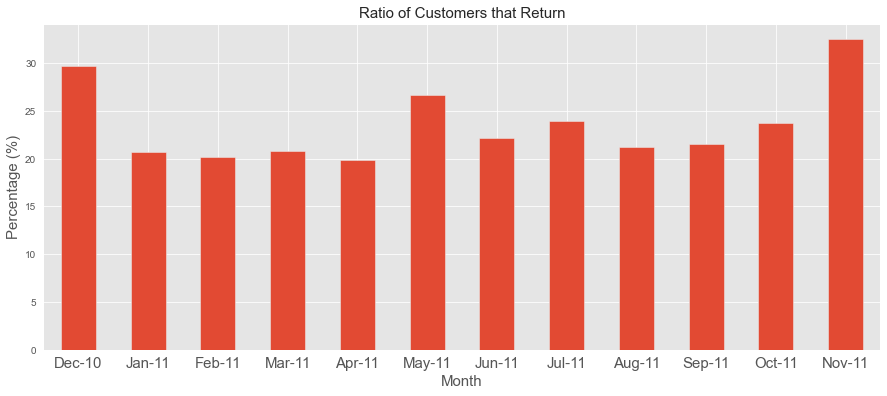

In [63]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)
monthly_repeat_ratio_chart = monthly_repeat_ratio.plot(kind='bar', figsize=(15,6))
monthly_repeat_ratio_chart.set_ylabel('Percentage (%)',fontsize=15)
monthly_repeat_ratio_chart.set_xlabel('Month',fontsize=15)
monthly_repeat_ratio_chart.set_title('Ratio of Customers that Return',fontsize=15)
monthly_repeat_ratio_chart.set_xticklabels(('Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11','Jul-11','Aug-11', 'Sep-11', 
                                           'Oct-11', 'Nov-11'), rotation='horizontal', fontsize=15)
plt.show()

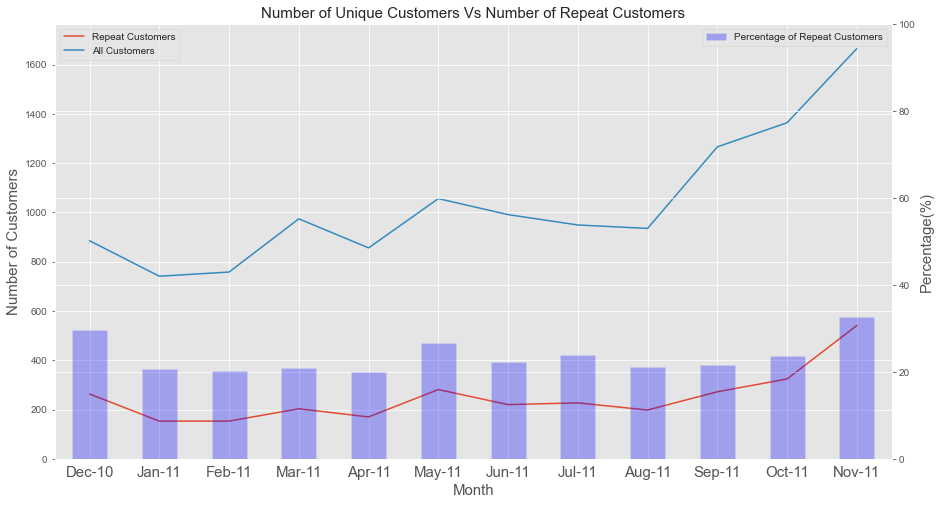

In [65]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(15,8))
pd.DataFrame(monthly_unique_customers.values).plot(ax=ax, grid=True)

ax2 = pd.DataFrame(monthly_repeat_ratio.values).plot.bar(ax=ax, grid=True, secondary_y=True, color='blue',alpha=0.3)

ax.set_ylabel('Number of Customers',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_title('Number of Unique Customers Vs Number of Repeat Customers',fontsize=15)

ax2.set_ylabel('Percentage(%)',fontsize=15)

ax.set_xticklabels(('Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11','Jul-11','Aug-11', 'Sep-11', 
                                           'Oct-11', 'Nov-11'), rotation='horizontal', fontsize=15)
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat Customers'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers.values.max()+100])
ax2.set_ylim([0,100])
plt.show()

In [84]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue = Invoice_customer_df.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()
monthly_revenue
# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_repeat_customers_df = Invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']
Percentage_rev_repeat_customer = monthly_rev_repeat_customers_df/monthly_revenue*100
Percentage_rev_repeat_customer

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

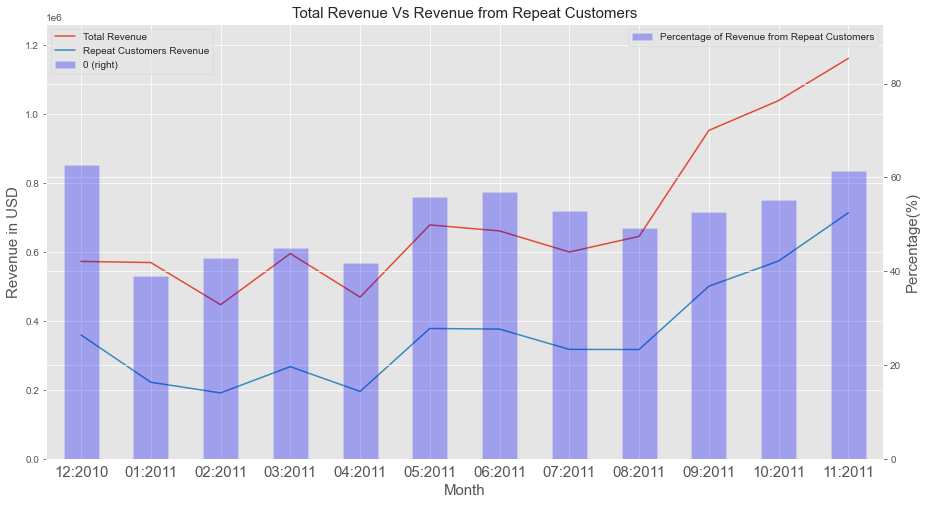

In [116]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue.values).plot(figsize=(15,8))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax, grid=True)

ax.set_ylabel('Revenue in USD',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_title('Total Revenue Vs Revenue from Repeat Customers',fontsize=15)
ax.legend(['Total Revenue', 'Repeat Customers Revenue'])

ax.set_ylim([0, monthly_revenue.values.max()+100000])

#ax2 = ax.twinx()
ax2 = pd.DataFrame(Percentage_rev_repeat_customer.values).plot.bar(ax=ax, grid=True, secondary_y=True, color='blue',alpha=0.3)



ax2.set_ylabel('Percentage(%)',fontsize=15)

ax.set_xticklabels([x.strftime('%m:%Y') for x in Percentage_rev_repeat_customer.index] , rotation='horizontal', fontsize=15)

ax2.legend(['Percentage of Revenue from Repeat Customers'])

ax2.set_ylim([0, Percentage_rev_repeat_customer.values.max()+30])

plt.show()

In [131]:
# Now let's get quantity of each item sold per month
stock_monthly_sale = df4.groupby(['Month_Year', 'StockCode'])['Quantity'].sum()
stock_monthly_sale.head(20)


Month_Year  StockCode
2010-12     10002        224
            10120         16
            10123C         1
            10124A         4
            10124G         5
            10125        143
            10133        123
            10135        366
            11001         65
            15034         38
            15036        132
            15039         17
            15044A         6
            15044B         2
            15044C         7
            15056BL      183
            15056N       132
            15056P        71
            15058A         1
            15058B         1
Name: Quantity, dtype: int64

In [137]:
# Rank items by the last month's sales
Last_month_sorted = stock_monthly_sale.loc['2011-11']
Last_month_sorted = Last_month_sorted.reset_index()
Last_month_sorted = Last_month_sorted.sort_values(by='Quantity', ascending=False)
Last_month_sorted

,Month_Year,StockCode,Quantity
2371,2011-11,84826,12551
1567,2011-11,23084,12393
827,2011-11,22197,8458
738,2011-11,22086,5919
2488,2011-11,85099B,5678
...,...,...,...
2572,2011-11,90016B,1
485,2011-11,21628,1
2575,2011-11,90019C,1
2578,2011-11,90026D,1


In [138]:
#Lets export df4 to csv for more visualization in Tableau and powerBi
df4.to_csv('Cleaned ecommerce data.csv')